In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pickle

# 1. Read the data

In [10]:
df = pd.read_csv(r"notebook\data\depression_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'notebook\\data\\depression_data.csv'

# 2. Get the look & feel of the data

In [7]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [8]:
df.tail()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No
413767,Joseph Johnson,62,Widowed,Master's Degree,0,Former,Moderate,Employed,107125.74,Moderate,Healthy,Good,No,Yes,No,No


# 3. Understand the datatypes & basic statistics of the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [10]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [11]:
df['History of Mental Illness'].value_counts()

# Data is imbalanced & needs to be handled before providing it to model.

No     287943
Yes    125825
Name: History of Mental Illness, dtype: int64

In [94]:
df.isnull().any()

# No null in the data.

Marital Status                  False
Education Level                 False
Number of Children              False
Smoking Status                  False
Physical Activity Level         False
Employment Status               False
Income                          False
Alcohol Consumption             False
Dietary Habits                  False
Sleep Patterns                  False
History of Mental Illness       False
History of Substance Abuse      False
Family History of Depression    False
Chronic Medical Conditions      False
Gender                          False
income_groups                   False
age_groups                      False
dtype: bool

In [13]:
df.duplicated().any()

# No duplicates in the data

False

# Feature Engineering.

# Generate gender from Name 

In [14]:
def get_first_name(fullname):
    firstname = ''
    try:
        firstname = fullname.split()[0] 
    except Exception as e:
        print(str(e))
    return firstname


In [15]:

import gender_guesser.detector as gender

gd = gender.Detector()
pat=r'(\,|\.|Mrs.|Jr.|Dr.|Mr.|Miss|Ms)'
df['Name'].replace(pat,'',regex=True, inplace=True)
df['Fname'] = df['Name'].map(lambda x: get_first_name(x))
df['Gender'] = df['Fname'].map(lambda x: gd.get_gender(x))

df['Gender'].replace('mostly_female', 'female', inplace=True)
df['Gender'].replace('mostly_male', 'male', inplace=True)
df['Gender'].replace('andy', 'female', inplace=True)
df['Gender'].replace('unknown', 'female', inplace=True)

df['Gender'].value_counts()

male      209232
female    204536
Name: Gender, dtype: int64

In [16]:
df['Income'].max()

209995.22

In [17]:
def age_groups(age):
    if age<13:
        return "Children"
    elif  (age >13) & (age<=17):
        return "Teenagers"
    elif (age > 17) & (age<24):
        return "Young Adults"
    elif (age > 24) & (age< 34):
        return "Adults"
    elif (age > 34) & (age< 60):
        return "Elderly"
    else:
        return "Retired"

In [18]:
def financial_status(income):
    if income < 30000:
        return "Low"
    elif income< 60000 :
        return "Middle Class"
    elif income < 100000:
        return "Upper Middle Class"
    else:
        return "Wealthy"

In [19]:
df["income_groups"] = df["Income"].apply(lambda x:financial_status(x))

In [20]:
df["age_groups"] = df["Age"].apply(lambda x:age_groups(x))

In [21]:

data_crosstab = pd.crosstab(df['Marital Status'], 
                            df['History of Mental Illness'],  
                               margins = False) 
print(data_crosstab) 

History of Mental Illness      No    Yes
Marital Status                          
Divorced                    23111   9618
Married                    167155  73289
Single                      50690  21420
Widowed                     46987  21498


In [22]:
df.drop('Name',axis=1,inplace=True)

(array([103438., 125739.,  56380.,  39450.,  43574.,  18596.,  14751.,
          7515.,   2179.,   2146.]),
 array([4.10000000e-01, 2.09998910e+04, 4.19993720e+04, 6.29988530e+04,
        8.39983340e+04, 1.04997815e+05, 1.25997296e+05, 1.46996777e+05,
        1.67996258e+05, 1.88995739e+05, 2.09995220e+05]),
 <BarContainer object of 10 artists>)

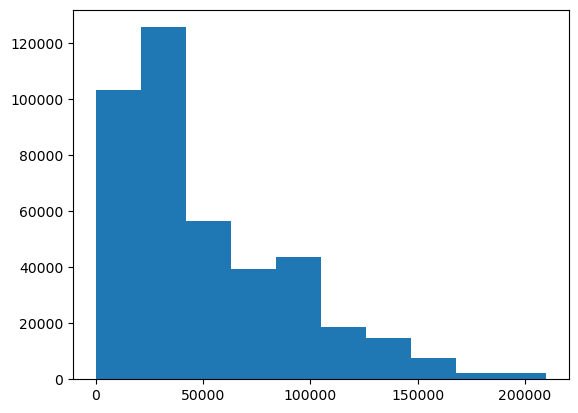

In [23]:
plt.hist(df['Income'])

# Income data is skewed

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

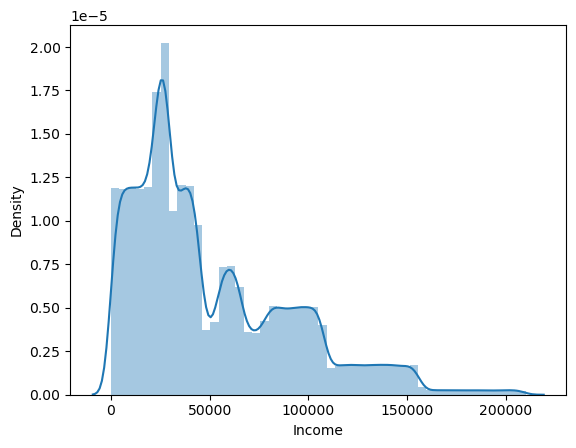

In [24]:
sns.distplot(df['Income'])

In [25]:
df['Income'].skew()

# Income is positively skewed - meaning we have more smaller values as it can be seen the plots above

1.086114667512213

In [26]:
numerical_col = ['Age', 'Income']

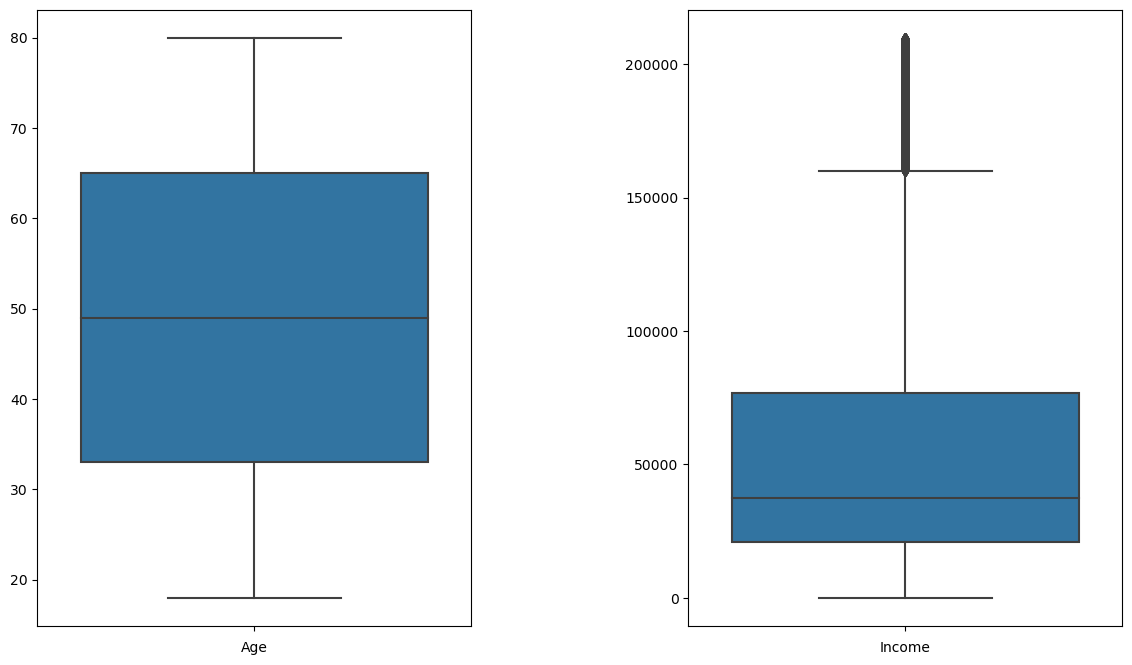

In [27]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.5)
for n,col in enumerate(numerical_col,1):
   plt.subplot(1,2,n)
   sns.boxplot(data=df,y=col)
   plt.xlabel(col)
   plt.ylabel("")
plt.show()

# There exists a outlier in the data - removing them will have an impact on the ML models, data analysis.

The Income feature has the outliers & needs to be treated. I would like to go with capping method.

In [28]:
# Finding the IQR
percentile25 = df['Income'].quantile(0.25)
percentile75 = df['Income'].quantile(0.75)


In [29]:
percentile25

21001.03

In [30]:
percentile75

76616.3

In [31]:
iqr = percentile75 - percentile25
iqr

55615.270000000004

In [32]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

# Threshold of Income above  the upperlimit (160039) & below lower limit is considered as a outlier

Upper limit 160039.20500000002
Lower limit -62421.875


In [33]:
df[df['Income'] > upper_limit]
# Total 5157 number of records are outliers

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Fname,Gender,income_groups,age_groups
15,38,Married,PhD,0,Non-smoker,Moderate,Employed,202449.17,High,Healthy,Fair,No,No,No,No,Daniel,male,Wealthy,Elderly
105,53,Widowed,PhD,3,Former,Sedentary,Employed,169400.38,High,Unhealthy,Good,No,Yes,Yes,No,Brandi,female,Wealthy,Elderly
170,36,Divorced,PhD,3,Non-smoker,Sedentary,Employed,180084.56,High,Unhealthy,Fair,No,Yes,No,No,Hunter,male,Wealthy,Elderly
193,64,Married,PhD,1,Non-smoker,Moderate,Employed,193843.44,Low,Healthy,Poor,No,No,Yes,No,Amy,female,Wealthy,Retired
319,31,Married,PhD,1,Current,Moderate,Employed,177029.40,High,Unhealthy,Poor,No,No,No,No,Alan,male,Wealthy,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413461,77,Widowed,PhD,0,Non-smoker,Moderate,Employed,200828.61,Moderate,Moderate,Fair,No,Yes,Yes,No,Alex,male,Wealthy,Retired
413563,76,Married,PhD,1,Former,Sedentary,Employed,164436.49,High,Unhealthy,Poor,No,No,No,No,Kyle,female,Wealthy,Retired
413574,41,Divorced,PhD,0,Former,Sedentary,Employed,171921.83,Low,Moderate,Good,No,Yes,Yes,Yes,Shawn,male,Wealthy,Elderly
413577,30,Married,PhD,1,Non-smoker,Moderate,Employed,169051.46,High,Healthy,Poor,Yes,Yes,No,No,Amanda,female,Wealthy,Adults


In [34]:
df[df['Income'] < lower_limit]

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Fname,Gender,income_groups,age_groups


In [35]:
df[df['Income'] > upper_limit]['Education Level'].unique()


array(['PhD'], dtype=object)

All the outliers in Income column are PHD holders & rightly so as they have the highest educational degree & are generally  paid higher compared to other degree holders.

In [36]:
new_df_cap = df.copy()

new_df_cap['Income'] = np.where(
    new_df_cap['Income'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Income'] < lower_limit,
        lower_limit,
        new_df_cap['Income']
    )
)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

<AxesSubplot:xlabel='Income'>

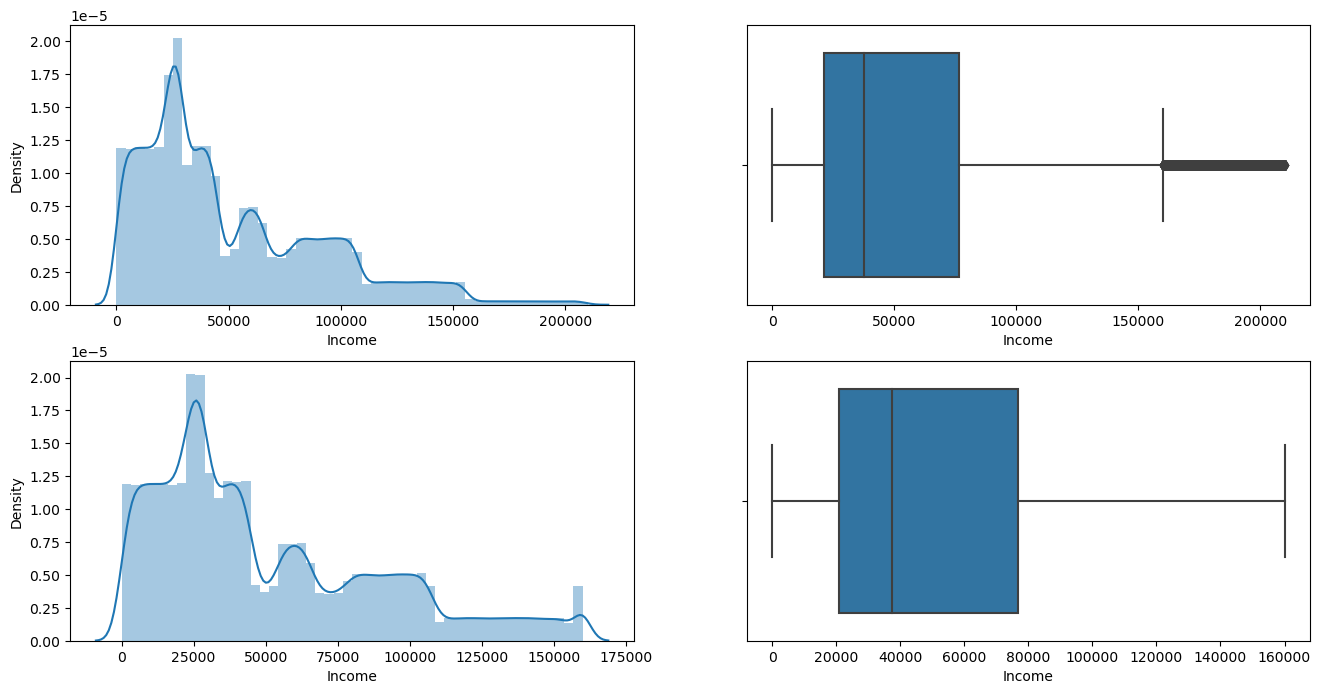

In [37]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Income'])

plt.subplot(2,2,2)
sns.boxplot(df['Income'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Income'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Income'])


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

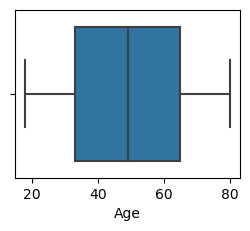

In [38]:
# No outlier in Age feature

plt.subplot(2,2,2)
sns.boxplot(df['Age'])

In [39]:
df = new_df_cap

In [93]:
df['Dietary Habits'].unique()

array(['Moderate', 'Unhealthy', 'Healthy'], dtype=object)

# Univariate & Bi-variate Analysis

In [95]:
def barplot(cols,row_n,col_n,hue_info=None):
    global df
    if hue_info == None:
        plt.figure(figsize=(18,10))
        plt.subplots_adjust(wspace=0.6)
        for n,col in enumerate(cols,1):
            plt.subplot(row_n,col_n,n)
            ax = sns.countplot(data=df,x=col,order = df[col].value_counts().index,color="#403C88",saturation=1)
            for contain in ax.containers:
                ax.bar_label(contain)
                
    if hue_info != None:
        plt.figure(figsize=(18,10))
        plt.subplots_adjust(wspace=0.6)
        for n,col in enumerate(cols,1):
            plt.subplot(row_n,col_n,n)
            ax = sns.countplot(data=df,x=col,color="#1AC9E6",order = df[col].value_counts().index,palette= ["#E71D34",'#140090'] , hue=hue_info,saturation=1)
            for contain in ax.containers:
                ax.bar_label(contain)
    return plt.show()


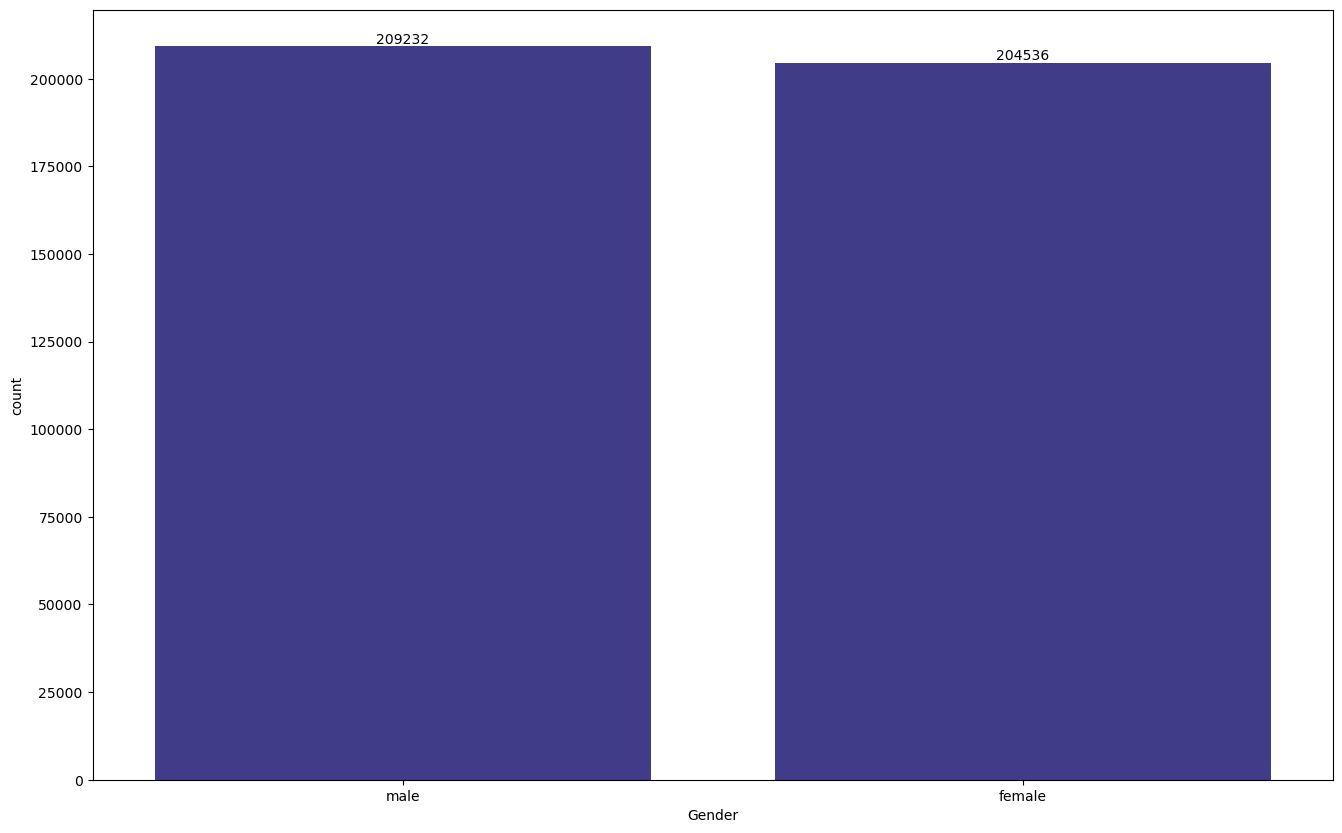

In [41]:
barplot(["Gender"],1,1)

The gender feature seems to be having equal distribution. We can check the correlation between this feature with y variable .

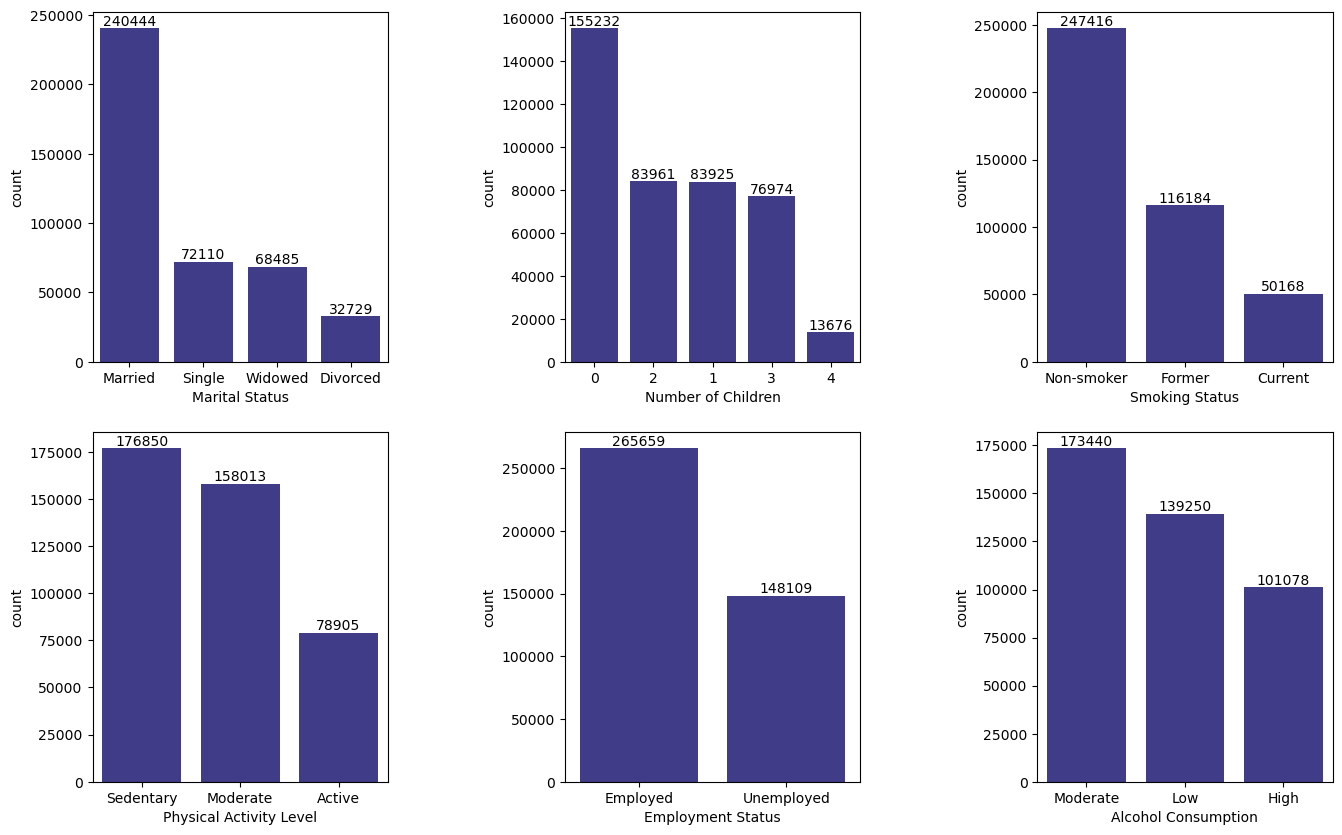

In [42]:
barplot(["Marital Status","Number of Children","Smoking Status"
          ,"Physical Activity Level","Employment Status","Alcohol Consumption"],2,3)

In [43]:
df['Age'].max()

80

In [44]:
df['age_groups'].value_counts()

Elderly         164709
Retired         150871
Adults           59123
Young Adults     39065
Name: age_groups, dtype: int64

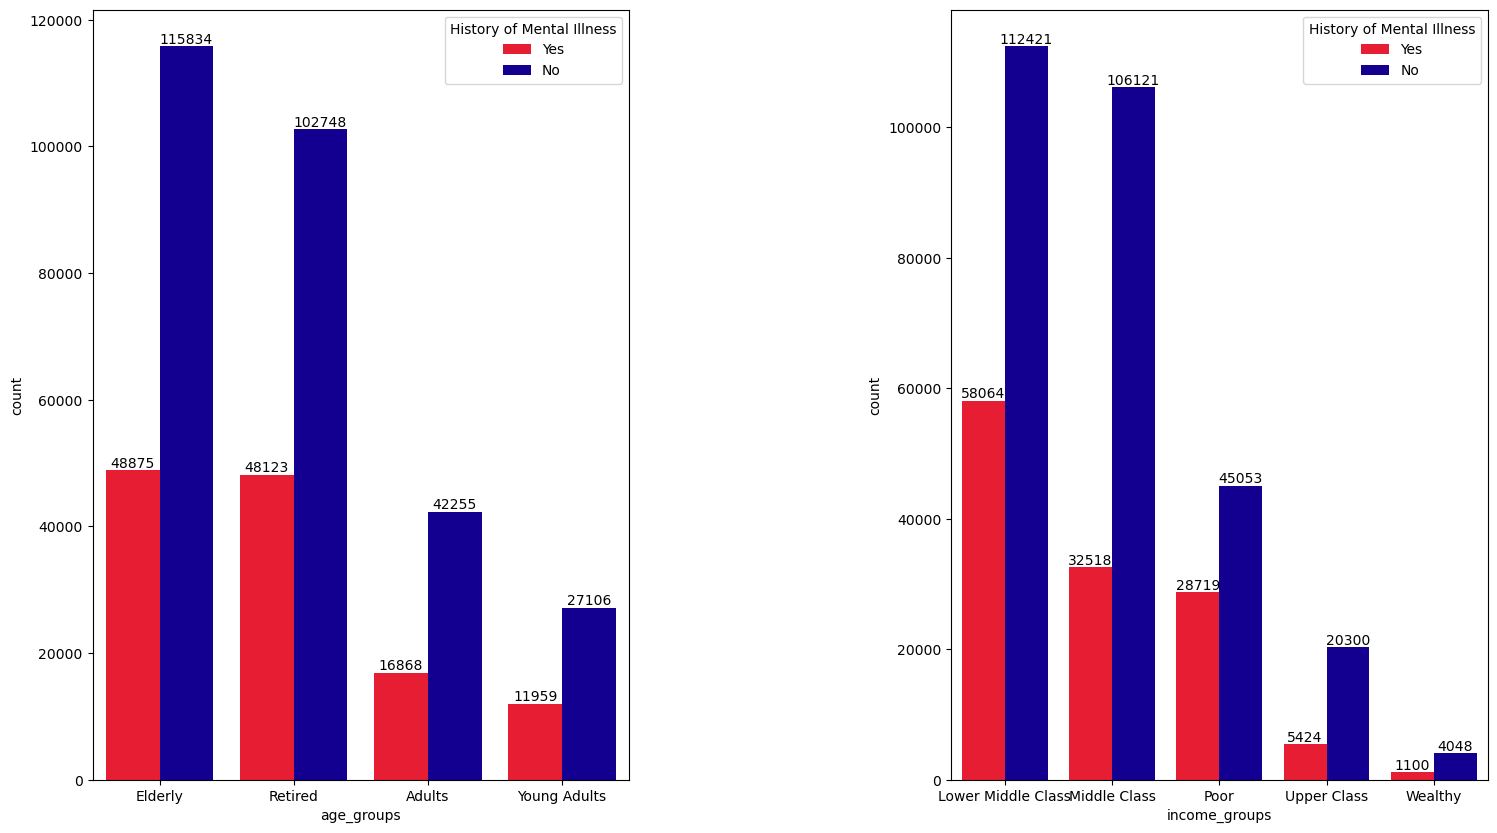

In [97]:
barplot(["age_groups","income_groups"],1,2,"History of Mental Illness")

Elderly people have higher risk of mental illness compared to young people.

Financially weaker group of people have higher risk of mental illness compared to rich people.

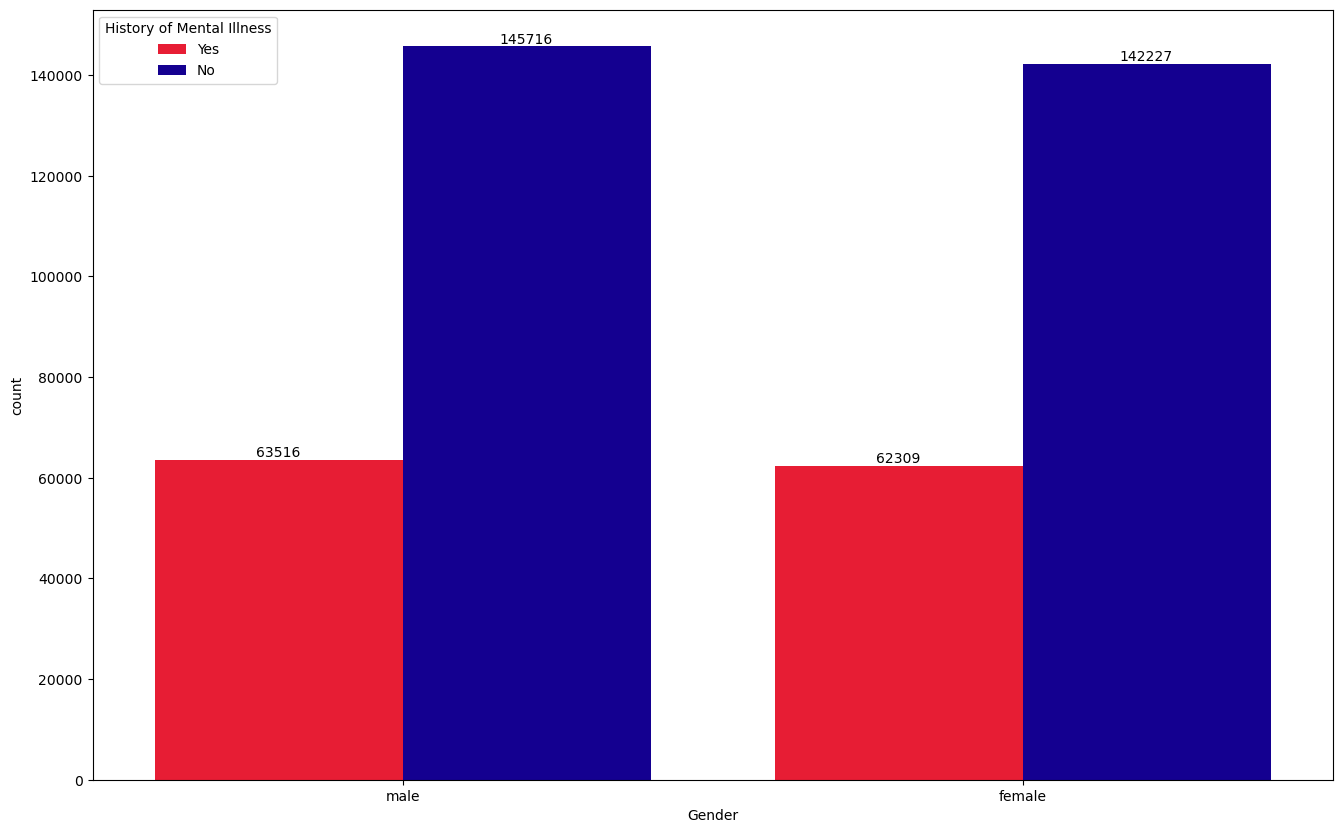

In [46]:
barplot(["Gender"],1,1,"History of Mental Illness")

It seems like both males, females have similar risk of health issues.

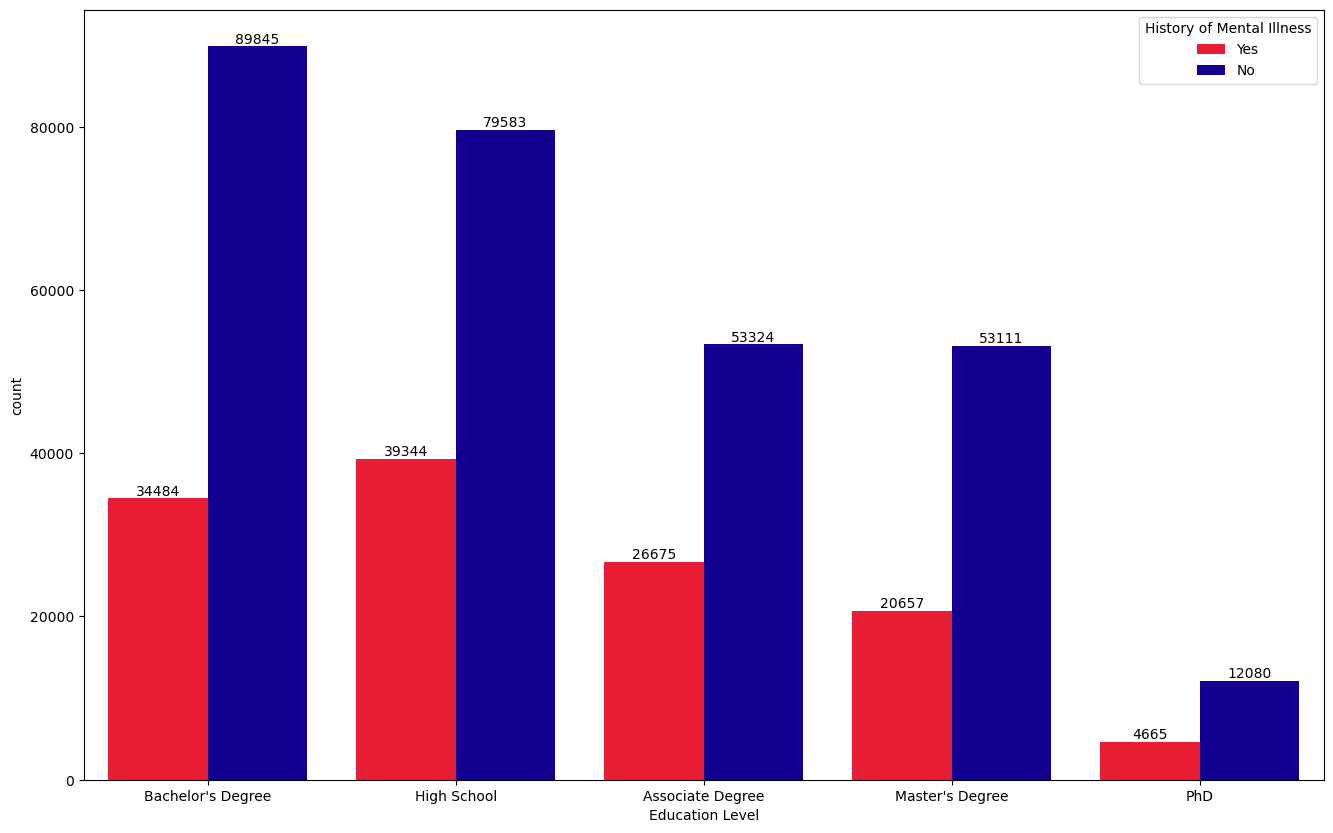

In [47]:
barplot(["Education Level"],1,1,"History of Mental Illness")

People with higher degree like PhD, Master's have lower risk of mental illness relative to people with High school or Bachelor's degree.

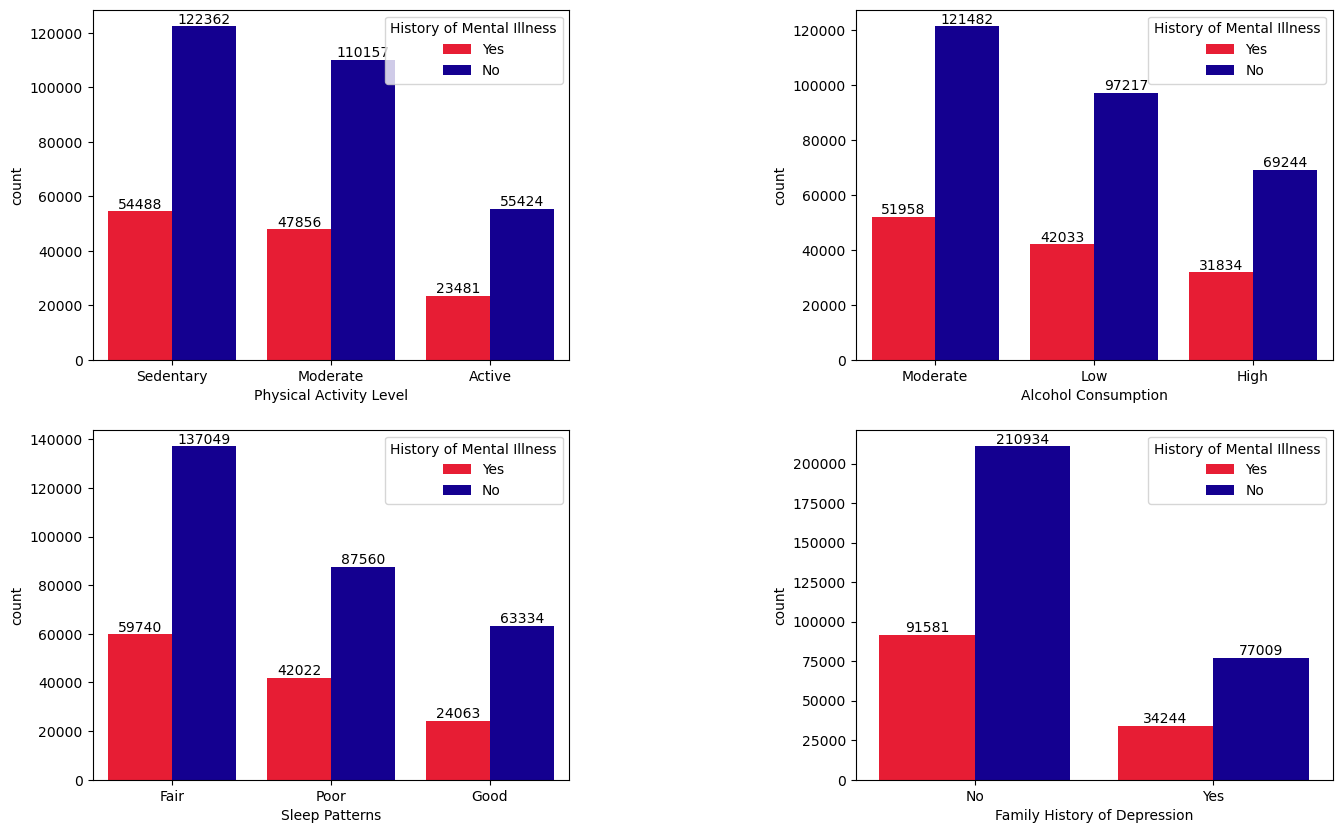

In [48]:
barplot(["Physical Activity Level","Alcohol Consumption","Sleep Patterns"
           ,"Family History of Depression"],2,2,"History of Mental Illness")

People with Active lifestyle, Good sleeping pattern, High alcohol consumption have lower risk of mental illness.


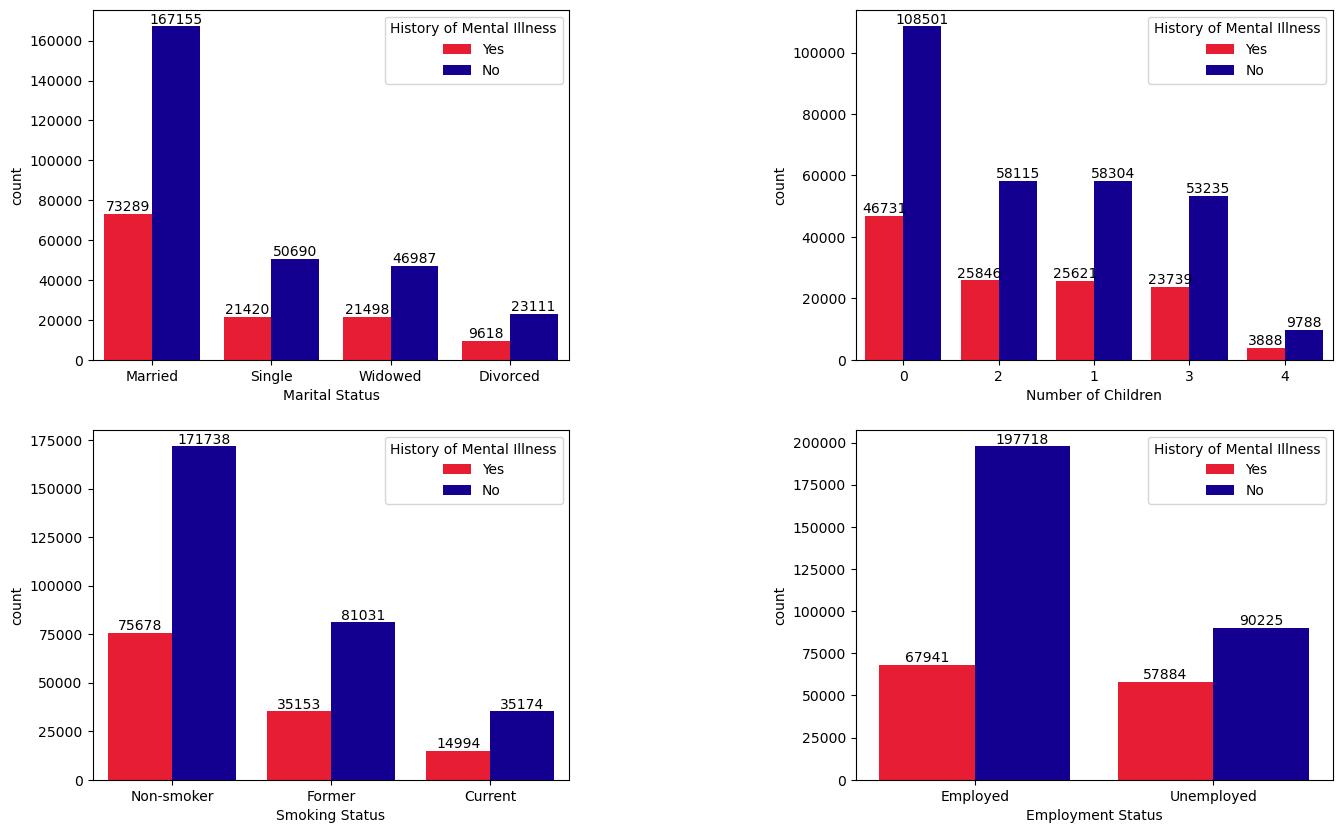

In [49]:
barplot(["Marital Status","Number of Children","Smoking Status"
           ,"Employment Status"],2,2,"History of Mental Illness")

People with no children , Married people , unemployed have higher chance of mental illness. 

Divorced people tend to have less risk as well as the current-moker have less risk.


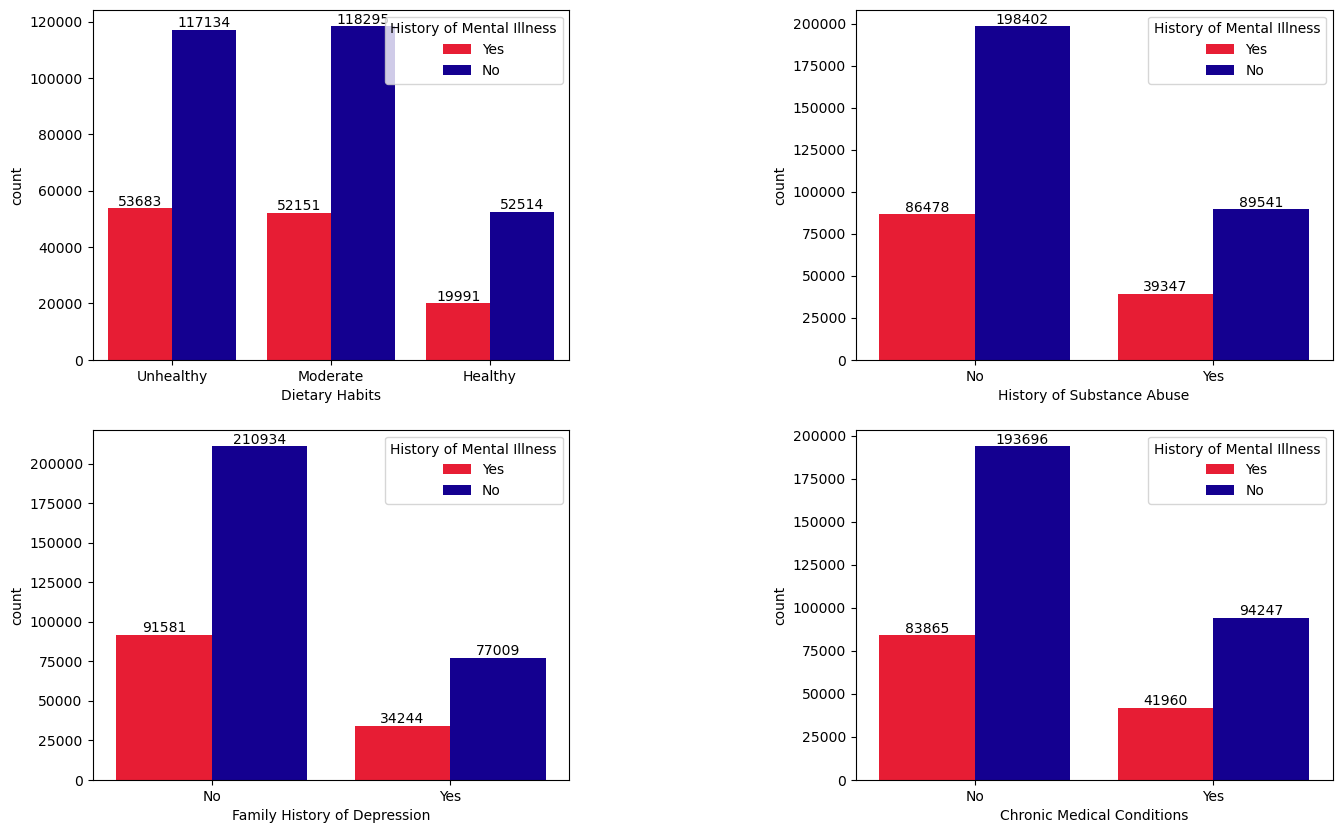

In [50]:
barplot(["Dietary Habits","History of Substance Abuse","Family History of Depression"
           ,"Chronic Medical Conditions"],2,2,"History of Mental Illness")

People who follow healthy lifestyle tend have less risk of mental illness.


# Correlation between the categorical variables using chi-square test 

In [51]:
import pandas as pd
from scipy.stats import chi2_contingency

# Function to perform Chi-Square test between two categorical variables
def chi_square_test(cat1, cat2):
    contingency_table = pd.crosstab(cat1, cat2)  # Create contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Function to check correlation between all pairs of categorical variables
def chi_square_correlation(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns
    correlated_features = []
    independent_features = []

    for i in range(len(categorical_columns)):
        for j in range(i+1, len(categorical_columns)):
            feature1 = categorical_columns[i]
            feature2 = categorical_columns[j]
            p_value = chi_square_test(df[feature1], df[feature2])

            # Chi-square test significance level (usually 0.05)
            if p_value < 0.05:
                correlated_features.append((feature1, feature2, p_value))
            else:
                independent_features.append((feature1, feature2, p_value))

    return correlated_features, independent_features


# Perform the Chi-Square test for all categorical pairs
correlated_features, independent_features = chi_square_correlation(df)

# Display correlated categorical features
print("Correlated Categorical Features:")
for feature1, feature2, p in correlated_features:
    if (feature1 == 'History of Mental Illness') | (feature2 == 'History of Mental Illness'):
        print(f"{feature1} and {feature2} are correlated with p-value {p}")

# Display independent categorical features
print("\nIndependent Categorical Features:")
for feature1, feature2, p in independent_features:
    if (feature1 == 'History of Mental Illness') | (feature2 == 'History of Mental Illness'):
        print(f"{feature1} and {feature2} are independent with p-value {p}")


Correlated Categorical Features:
Marital Status and History of Mental Illness are correlated with p-value 5.409031887961224e-14
Education Level and History of Mental Illness are correlated with p-value 5.678973600047682e-302
Smoking Status and History of Mental Illness are correlated with p-value 0.0032730141384533966
Physical Activity Level and History of Mental Illness are correlated with p-value 2.5562562939064635e-07
Employment Status and History of Mental Illness are correlated with p-value 0.0
Alcohol Consumption and History of Mental Illness are correlated with p-value 2.7124703085166094e-17
Dietary Habits and History of Mental Illness are correlated with p-value 2.1242586440978167e-79
Sleep Patterns and History of Mental Illness are correlated with p-value 3.30469070431477e-129
History of Mental Illness and Family History of Depression are correlated with p-value 0.0016897082070443303
History of Mental Illness and Chronic Medical Conditions are correlated with p-value 0.0001043

# History of Mental Illness is not correlated with Name , Gender & History of Substance Abuse. 

# We can filter these features.

In [52]:
df = df.loc[:, ~df.columns.isin(['Age', 'Fname'])]

In [53]:
X = df.drop(['History of Mental Illness'], axis = 1)
y = df['History of Mental Illness']

In [54]:
y.value_counts()

No     287943
Yes    125825
Name: History of Mental Illness, dtype: int64

In [55]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [56]:
X = preprocessor.fit_transform(X)

In [57]:
X[0]

array([ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.5666923 , -0.60745955])

In [58]:
y
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([1, 1, 0, ..., 0, 0, 0])

In [59]:
len(y_encoded[y_encoded==1])

125825

In [60]:
def encode_and_bind(original_dataframe, feature_to_encode):
    res = original_dataframe
    for feature in feature_to_encode:
        dummies = pd.get_dummies(original_dataframe[[feature]])
        res = pd.concat([res, dummies], axis=1)
        res = res.drop([feature], axis=1)
    return(res)

#  Trying Classifier models on un-balanced raw data.

In [63]:
def try_all_classifiers(X, y, test_size=0.3, random_state=42):
    # Encode categorical target variable if needed
    cat_features = [i for i in df.columns if df.dtypes[i]=='object']
    
#     if X.dtypes == 'object':
#         le = LabelEncoder()
#         encoded = le.fit_transform(X)
#         X = le.fit_transform(X)
    
#     for column in df.columns:
#     if df[column].dtype.all() == 'object':  # Check if the column is categorical (dtype == 'object')
#         le = LabelEncoder()
#         df[column] = le.fit_transform(df[column])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize a StandardScaler to standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize a dictionary to hold models and their names
    models = {
        "Logistic Regression": LogisticRegression(),
#         "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting (XGBoost)": XGBClassifier(),
#         "Support Vector Machine": SVC(probability=True),
        "Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier()
    }

    # Loop through models, train and evaluate them
    results = []
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'

        # Store results
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "AUC-ROC": auc
        })

        # Print classification report and confusion matrix
        print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))
        print(f"\n{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("-" * 80)
    
    # Return the results as a DataFrame
    return pd.DataFrame(results)

In [65]:

# Call the function to try all classifiers
results_df = try_all_classifiers(X, y_encoded)
print(results_df)

Training Logistic Regression...


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classifi


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     86319
           1       0.00      0.00      0.00     37812

    accuracy                           0.70    124131
   macro avg       0.35      0.50      0.41    124131
weighted avg       0.48      0.70      0.57    124131


Logistic Regression Confusion Matrix:
 [[86319     0]
 [37812     0]]
--------------------------------------------------------------------------------
Training Decision Tree...

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70     86319
           1       0.32      0.34      0.33     37812

    accuracy                           0.58    124131
   macro avg       0.51      0.51      0.51    124131
weighted avg       0.59      0.58      0.58    124131


Decision Tree Confusion Matrix:
 [[59236 27083]
 [24879 12933]]
-------------------

# Balancing data using SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
x_new,y_new=smote.fit_resample(X,y_encoded)


In [67]:
len(y_new[y_new==0])

287943

In [68]:
len(y_new[y_new==1])

287943

In [69]:

# Call the function to try all classifiers
results_df_new = try_all_classifiers(x_new, y_new)
print(results_df_new)

Training Logistic Regression...

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.60      0.58     86344
           1       0.58      0.55      0.56     86422

    accuracy                           0.57    172766
   macro avg       0.57      0.57      0.57    172766
weighted avg       0.57      0.57      0.57    172766


Logistic Regression Confusion Matrix:
 [[51439 34905]
 [39058 47364]]
--------------------------------------------------------------------------------
Training Decision Tree...

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.64     86344
           1       0.65      0.66      0.65     86422

    accuracy                           0.65    172766
   macro avg       0.65      0.65      0.65    172766
weighted avg       0.65      0.65      0.65    172766


Decision Tree Confusion Matrix:
 [[55223 31121]
 [2

# Hyper-parameter Tuning

In [82]:
# Import necessary libraries

from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
import pickle

def train_and_tune(X, y):
    # Step 1: Split the dataset into training and testing sets
    print("Step 1\n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 2: Hyperparameter tuning using RandomizedSearchCV

    print("Step 2\n")
    # Random Forest hyperparameters
    rf_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # XGBoost hyperparameters
    xgb_params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 10],
        'subsample': [0.6, 0.8, 1.0]
    }

    # LightGBM hyperparameters
    lgb_params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100],
        'boosting_type': ['gbdt', 'dart']
    }

    # Step 3: Initialize models
    print("Step 3\n")
    rf_model = RandomForestClassifier(random_state=42)
    xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    lgb_model = lgb.LGBMClassifier(random_state=42)

    # Step 4: Define the scorer as F1 score (binary or macro for multi-class)
    print("Step 4\n")
    f1_scorer = make_scorer(f1_score, average='macro')

    # Step 5: Perform RandomizedSearchCV for each model
    print("Step 5.1\n")
    rf_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, scoring=f1_scorer, n_iter=5, cv=3, random_state=42,verbose=2)
    print("Step 5.2\n")
    xgb_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, scoring=f1_scorer, n_iter=5, cv=3, random_state=42,verbose=2)
    print("Step 5.3\n")
    lgb_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=lgb_params, scoring=f1_scorer, n_iter=5, cv=3, random_state=42,verbose=2)

    # Fit the models
    print("Step 5.1.1\n")
    rf_search.fit(X_train, y_train)
    print("Step 5.2.1\n")
    xgb_search.fit(X_train, y_train)
    print("Step 5.3.1\n")
    lgb_search.fit(X_train, y_train)

    # Step 6: Evaluate the models on the test set
    rf_f1 = f1_score(y_test, rf_search.predict(X_test), average='macro')
    xgb_f1 = f1_score(y_test, xgb_search.predict(X_test), average='macro')
    lgb_f1 = f1_score(y_test, lgb_search.predict(X_test), average='macro')

    # Step 7: Find the best model based on F1 score
    best_model = None
    best_f1 = max(rf_f1, xgb_f1, lgb_f1)

    if best_f1 == rf_f1:
        best_model = rf_search.best_estimator_
        print("Best model: Random Forest with F1 score:", rf_f1)
    elif best_f1 == xgb_f1:
        best_model = xgb_search.best_estimator_
        print("Best model: XGBoost with F1 score:", xgb_f1)
    else:
        best_model = lgb_search.best_estimator_
        print("Best model: LightGBM with F1 score:", lgb_f1)

    # Step 8: Save the best model as a pickle file
    with open(r'C:\Users\admin\Downloads\archive\best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    
    return best_model

# Example Usage
# Assume X, y are the feature matrix and target variable respectively
# X, y = your_dataset.drop('target', axis=1), your_dataset['target']
# best_model = train_and_tune(X, y)


In [83]:
results_df = train_and_tune(X, y_encoded)
print(results_df)

Step 1

Step 2

Step 3

Step 4

Step 5.1

Step 5.2

Step 5.3

Step 5.1.1

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 1.8min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 1.8min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 1.8min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 8.9min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.4min
[CV] END max_depth=None, min_samples_leaf=1, min

C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   4.4s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   2.4s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.8s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   2.7s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   2.4s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   2.9s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  11.5s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   9.2s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   7.9s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.4s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.0s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.9s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   4.3s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   4.4s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   4.2s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Step 5.3.1

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Info] Number of positive: 67028, number of negative: 153648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 220676, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303739 -> initscore=-0.829554
[LightGBM] [Info] Start training from score -0.829554
[CV] END boosting_type=gbdt, learning_rate=0.2, n_estimators=100, num_leaves=50; total time=   1.9s
[LightGBM] [Info] Number of positive: 67028, number of negative: 153648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you ca

Best Model

In [99]:
print(results_df)


RandomForestClassifier(max_depth=30, n_estimators=300, random_state=42)


In [85]:
results_df_new = train_and_tune(x_new,y_new)
print(results_df_new)

Step 1

Step 2

Step 3

Step 4

Step 5.1

Step 5.2

Step 5.3

Step 5.1.1

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 3.9min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 4.2min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 4.3min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 3.2min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 3.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 3.4min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 3.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 3.3min
[CV] END max_depth=None, min_samples_leaf=1, min

C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.1s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   4.8s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.3s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   4.2s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.6s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   4.1s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  27.5s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  21.1s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  18.5s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.7s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   7.3s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   6.0s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   9.8s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   9.9s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=  10.0s


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Step 5.3.1

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Info] Number of positive: 153463, number of negative: 153675
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10871
[LightGBM] [Info] Number of data points in the train set: 307138, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499655 -> initscore=-0.001380
[LightGBM] [Info] Start training from score -0.001380
[CV] END boosting_type=gbdt, learning_rate=0.2, n_estimators=100, num_leaves=50; total time=   3.1s
[LightGBM] [Info] Number of positive: 153463, number of negative: 153676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, yo

# Random Forest Classifier gives best performance with  F1 score: 0.74

We can export this model in .pkl file to be used for prediction